# `Final Assignment: Analyzing Historical Stock/Revenue Data For Tesla & Gamestop and Building a Dashboard`

In [1]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

# **Question 1:** Use yfinance to Extract Stock Data

In [4]:
tesla = yf.Ticker('TSLA')

In [5]:
tesla_df = tesla.history(period='max')

In [7]:
tesla_df.reset_index(inplace=True)

In [8]:
tesla_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# **Question 2:** Use Webscraping to Extract Tesla Revenue Data

In [10]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

In [11]:
html_data = requests.get(url).text

In [12]:
soup = BeautifulSoup(html_data, 'html.parser')

In [13]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    # Finally we append the data of each row to the table
    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)    

In [17]:
warnings.filterwarnings('ignore', category=SyntaxWarning)

In [18]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [19]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [20]:
tesla_revenue.tail()

,Date,Revenue
8,2013,"$2,013"
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112


# **Question 3:** Use yfinance to Extract Stock Data

In [21]:
gamestop = yf.Ticker('GME')

In [22]:
gme_data = gamestop.history('max')

In [23]:
gme_data.reset_index(inplace=True)  

In [24]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# **Question 4:** Use Webscraping to Extract GME Revenue Data

In [25]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

In [26]:
html_data = requests.get(url).text

In [27]:
soup = BeautifulSoup(html_data, 'html.parser')

In [28]:
gamestop_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    # Finally we append the data of each row to the table
    gamestop_revenue = pd.concat([gamestop_revenue, pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)    

In [29]:
gamestop_revenue.tail()

,Date,Revenue
11,2009,"$8,806"
12,2008,"$7,094"
13,2007,"$5,319"
14,2006,"$3,092"
15,2005,"$1,843"


# **Question 5:** Plot Tesla Stock Graph

In [32]:
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('$','')

In [33]:
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',','')

In [35]:
tesla_revenue.head()

,Date,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759


In [37]:
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype('int')

In [39]:
warnings.filterwarnings('ignore', category=UserWarning)

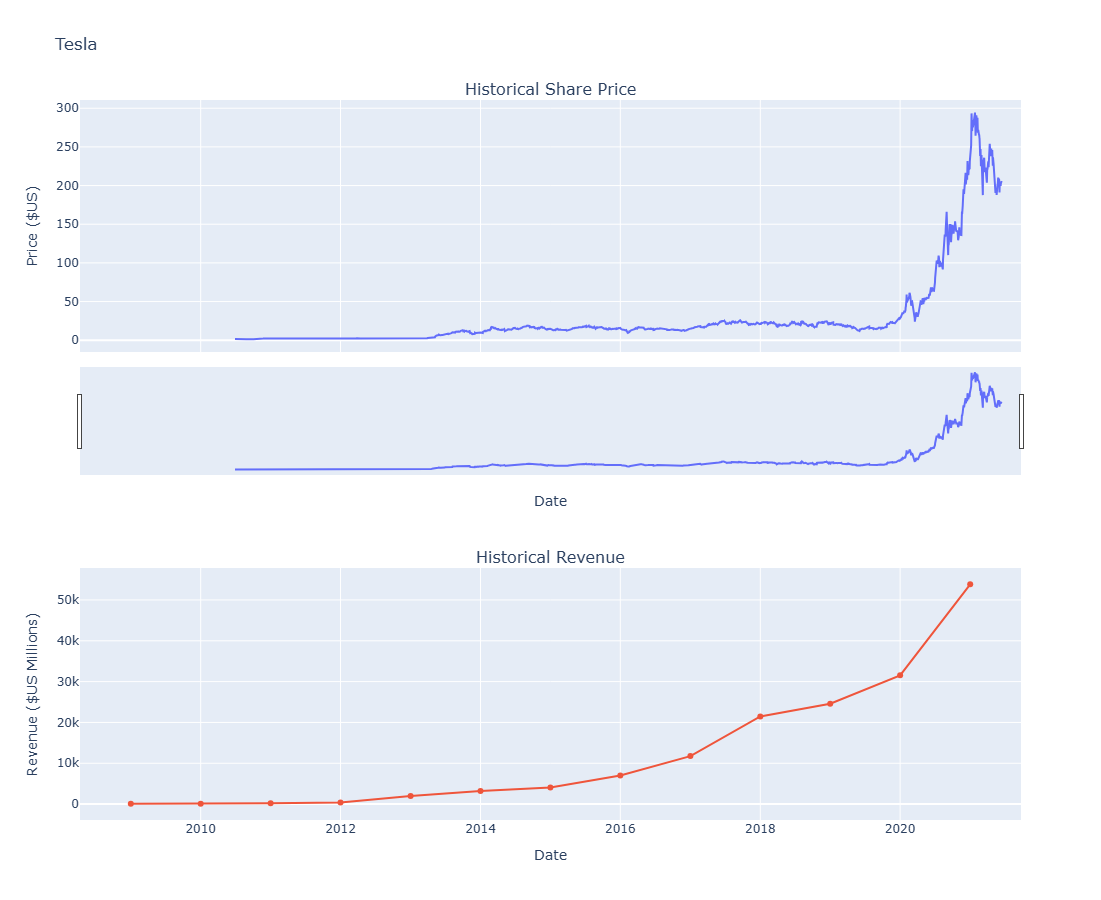

In [40]:
make_graph(tesla_df, tesla_revenue, 'Tesla')

# **Question 6:** Plot GameStop Stock Graph

In [42]:
gamestop_revenue.head()

,Date,Revenue
0,2020,"$6,466"
1,2019,"$8,285"
2,2018,"$8,547"
3,2017,"$7,965"
4,2016,"$9,364"


In [46]:
gamestop_revenue['Revenue'] = gamestop_revenue['Revenue'].str.replace('$', '')

In [47]:
gamestop_revenue['Revenue'] = gamestop_revenue['Revenue'].str.replace(',', '')

In [48]:
gamestop_revenue.head()

,Date,Revenue
0,2020,6466
1,2019,8285
2,2018,8547
3,2017,7965
4,2016,9364


In [50]:
gamestop_revenue['Revenue'] = gamestop_revenue['Revenue'].astype('int')

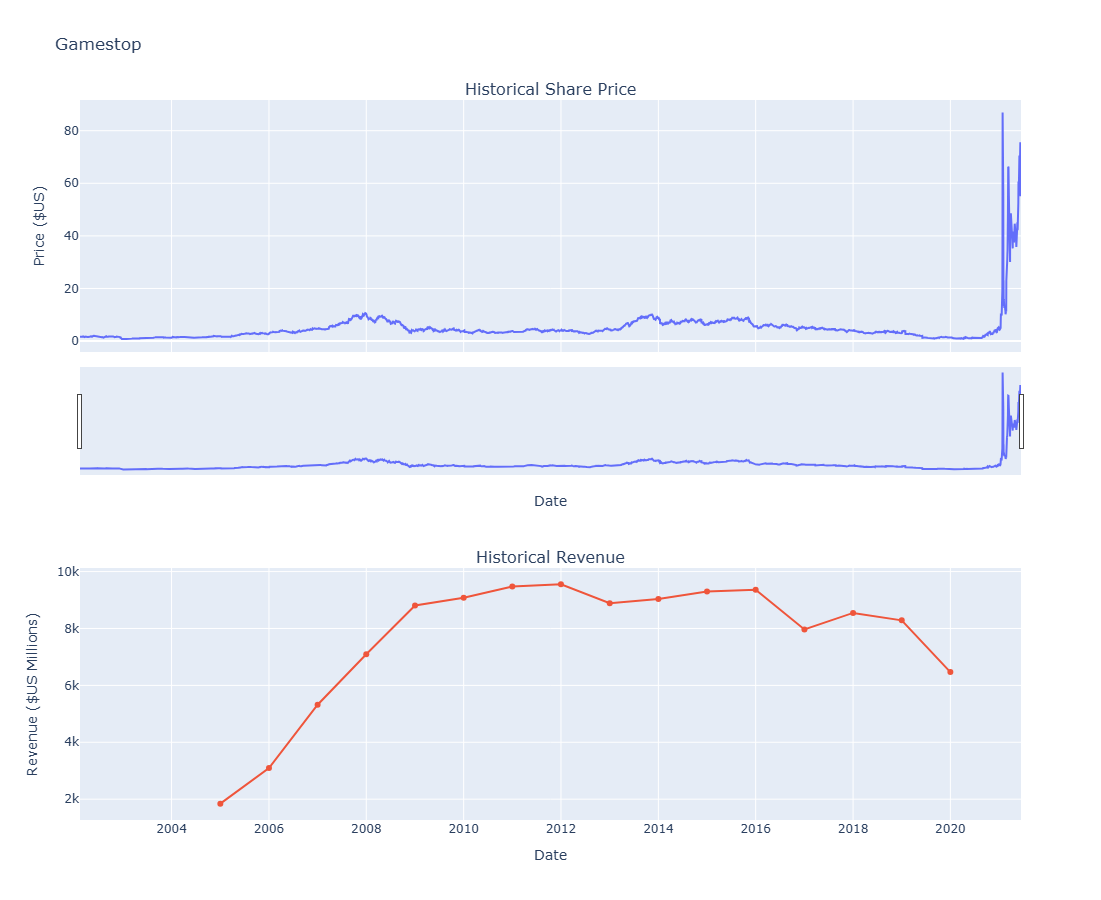

In [51]:
make_graph(gme_data, gamestop_revenue, 'Gamestop')